In [1]:
import torch
import torchvision.transforms as transforms              
from torchvision.datasets import ImageFolder
import torchvision.models as models
from torchvision.models import Inception_V3_Weights
from torch.utils.data import DataLoader
import numpy as np
from torch.utils.data import Subset
from src.temperature_scaling import ModelWithTemperature
from src.imagenet_real import aps_imagenet_real_hist, raps_imagenet_real_hist, saps_imagenet_real_hist, aps_imagenet_real_scatter, raps_imagenet_real_scatter, saps_imagenet_real_scatter

# load pre-trained model InceptionV3 and set mode
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.inception_v3(weights=Inception_V3_Weights.IMAGENET1K_V1).to(device)

#  Reprocess: Center Crop and then resize to 299*299
data_transform = transforms.Compose([
    transforms.CenterCrop(299),
    transforms.Resize(299), 
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) 
])

sorted_val_path = "D:\\Download\\ImageNet-1K\\Validation_Set\\sorted_ImageNet_val"
dataset = ImageFolder(root=sorted_val_path, transform=data_transform)

# Temperature Scaling
model.eval() # only use output.logits of Inception's output
subset_size = len(dataset) // 10
indices = np.random.choice(len(dataset), subset_size, replace=False)
subset_dataset = Subset(dataset, indices)
train_loader = DataLoader(subset_dataset, batch_size=32, shuffle=False, num_workers=4)

model = ModelWithTemperature(model, temperature = 1.0).to(device)
model.set_temperature(train_loader)
model.eval()

# The number of times the experiment is going to be repeated
num_runs = 10

# error rate
alpha = 0.1

Before temperature - NLL: 1.069, ECE: 0.017
Optimal temperature: 0.963
After temperature - NLL: 1.058, ECE: 0.025


APS Classification on ImageNet Real (alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8882 ± 0.0020
Final Average Prediction Set Size: 49.96 ± 1.19
Final Average Coverage: 0.8995 ± 0.0034
Final Average Real Probability: 0.8104 ± 0.0036


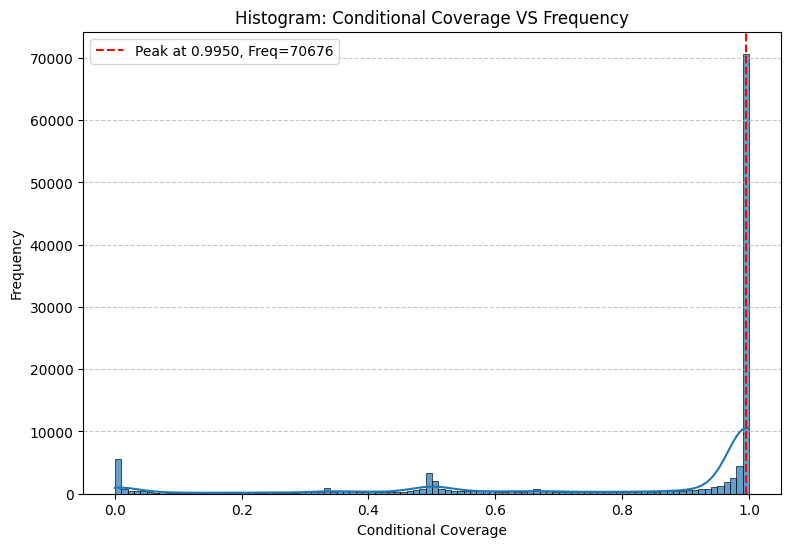

70676 (56.83%) samples reached the peak conditional coverage at 0.9950


In [2]:
aps_imagenet_real_hist(model, dataset, device, num_runs, alpha, is_ground_truth=False)

RAPS Classification on ImageNet Real (alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9584 ± 0.0022
Final Average Prediction Set Size: 3.04 ± 0.04
Final Average Coverage: 0.8998 ± 0.0028
Final Average Real Probability: 0.7454 ± 0.0035


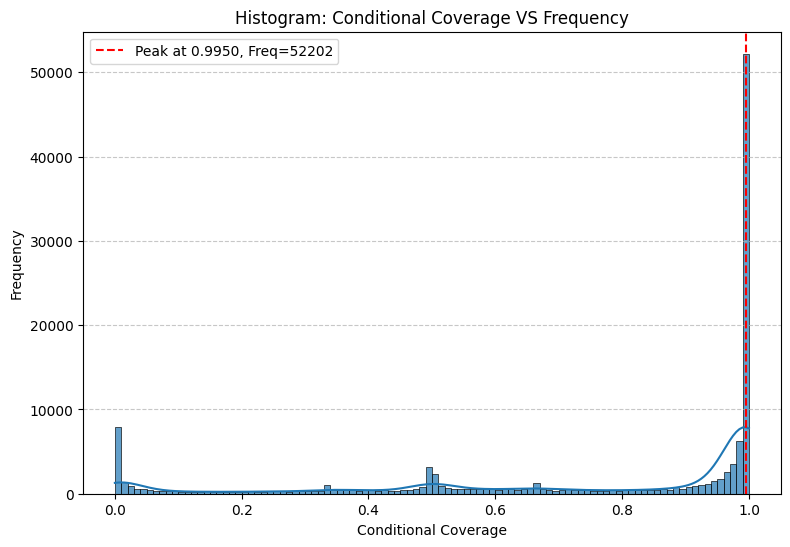

52202 (41.98%) samples reached the peak conditional coverage at 0.9950


In [2]:
raps_imagenet_real_hist(model, dataset, device, lambda_=0.2, k_reg=4, num_runs=10, alpha=0.1, is_ground_truth=False)

SAPS Classification on ImageNet Real (alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9976 ± 0.0034
Final Average Prediction Set Size: 2.51 ± 0.02
Final Average Coverage: 0.9003 ± 0.0014
Final Average Real Probability: 0.7258 ± 0.0028


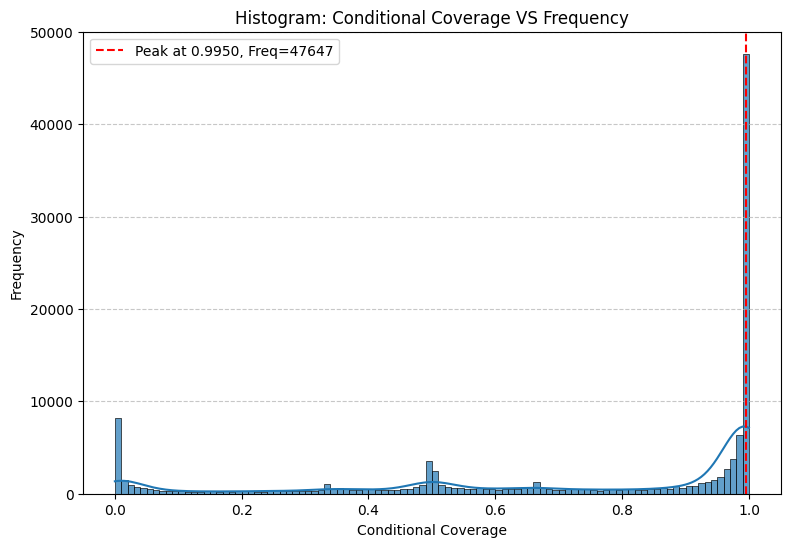

47647 (38.31%) samples reached the peak conditional coverage at 0.9950


In [2]:
saps_imagenet_real_hist(model, dataset, device, lambda_=0.15, num_runs=10, alpha=0.1, is_ground_truth=False)

APS Classification on ImageNet Real (alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8887 ± 0.0020
Final Average Prediction Set Size: 49.82 ± 1.22
Final Average Coverage: 0.8995 ± 0.0034
Final Average Real Probability: 0.8102 ± 0.0037


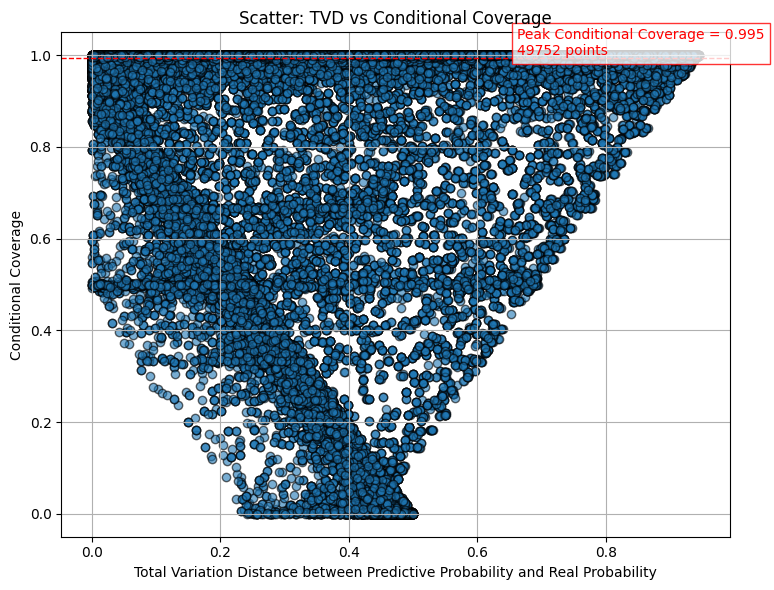

Peak Conditional Coverage = 0.995, with 49752 samples

=== Count Regions Summary ===
41105 (33.1%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
27547 (22.2%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
31237 (25.1%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.96188']
  Real Probability Set      : ['0.91432']
Sample 2:
  Predictive Probability Set: ['0.80099', '0.02734', '0.01800', '0.01715', '0.00431', '0.00411', '0.00343', '0.00343', '0.00255', '0.00122', '0.00108', '0.00088', '0.00083', '0.00068', '0.00064', '0.00061', '0.00058', '0.00053', '0.00051']
  Real Probability Set      : ['0.79686', '0.00023', '0.00326', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000']
Sample 3:
  Predictive Probability Set: ['0.98270']
  Real Prob

In [2]:
aps_imagenet_real_scatter(model, dataset, device, num_runs, alpha)

RAPS Classification on ImageNet Real (alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9581 ± 0.0022
Final Average Prediction Set Size: 3.05 ± 0.04
Final Average Coverage: 0.8998 ± 0.0028
Final Average Real Probability: 0.7455 ± 0.0035


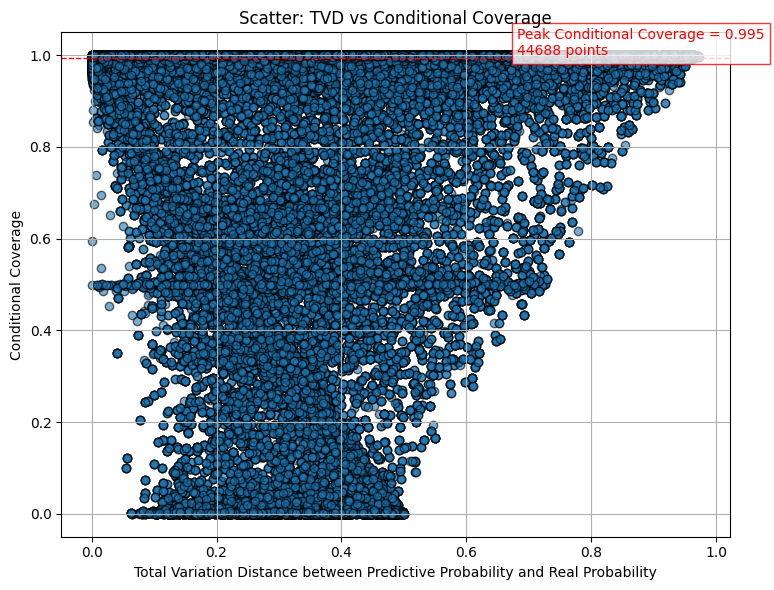

Peak Conditional Coverage = 0.995, with 44688 samples

=== Count Regions Summary ===
51492 (41.4%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
19323 (15.5%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
43654 (35.1%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.99350']
  Real Probability Set      : ['0.98823']
Sample 2:
  Predictive Probability Set: ['0.95603']
  Real Probability Set      : ['0.98447']
Sample 3:
  Predictive Probability Set: ['0.97225']
  Real Probability Set      : ['0.99835']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.99297']
  Real Probability Set      : ['0.18878']
Sample 2:
  Predictive Probability Set: ['0.43197', '0.13560', '0.11278', '0.10080']
  Real Probability Set      : ['0.00027', '0.03981', '0.00178', '0.00027']
Sample 3:
  Predictive Probability Set: ['0.37713', '0.15415', '0.052

In [3]:
raps_imagenet_real_scatter(model, dataset, device, lambda_=0.2, k_reg=4, num_runs=10, alpha=0.1)

SAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9993 ± 0.0035
Final Average Prediction Set Size: 2.51 ± 0.02
Final Average Coverage: 0.9002 ± 0.0014
Final Average Real Probability: 0.7256 ± 0.0028


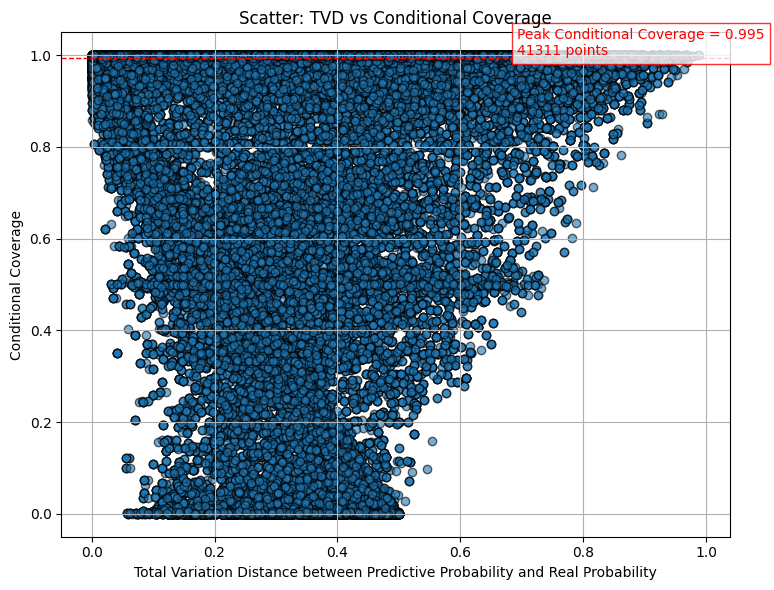

Peak Conditional Coverage = 0.995, with 41311 samples

=== Count Regions Summary ===
50518 (40.6%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
17796 (14.3%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
47920 (38.5%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.99779']
  Real Probability Set      : ['0.99980']
Sample 2:
  Predictive Probability Set: ['0.91224']
  Real Probability Set      : ['0.91484']
Sample 3:
  Predictive Probability Set: ['0.99637']
  Real Probability Set      : ['0.98489']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.90532']
  Real Probability Set      : ['0.00059']
Sample 2:
  Predictive Probability Set: ['0.91925']
  Real Probability Set      : ['0.18031']
Sample 3:
  Predictive Probability Set: ['0.51511', '0.06010', '0.03061', '0.01869', '0.01653']
  Real Probability Set      : ['0.06999

In [2]:
saps_imagenet_real_scatter(model, dataset, device, lambda_=0.15, num_runs=10, alpha=0.1)